In [1]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

com_class = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_class = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
all_class = com_class + rec_class

exclude_sign = "~#$%^&*()[]{}<>|+=1234567890"
replace_sign = "@,.?!-;"

In [18]:
def preprocessing(data):
    ans = []
    for i in range(len(data)):
        sentence = data[i]
        for c in exclude_sign:
            sentence = sentence.replace(c, "")
        for c in replace_sign:
            sentence = sentence.replace(c, " ")
        ans.append(sentence)
    return ans

def plot_contingency_matrix(cm, x_labels, y_labels, title, cmap = plt.cm.BuPu):
    plt.figure(figsize=(12,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title, fontsize = 22)
    plt.colorbar()
    xlocations = np.array(range(len(x_labels)))
    plt.xticks(xlocations, x_labels)
    plt.yticks(xlocations, y_labels)
    tick_array = np.arange(len(x_labels))
    x, y = np.meshgrid(tick_array, tick_array)
    for i, j in zip(x.flatten(), y.flatten()):
        plt.text(j, i, cm[i][j], ha = "center", va = "center", color = "black", fontsize = 24)
    plt.ylabel('Classes', fontsize = 18)
    plt.xlabel('Clusters', fontsize = 18)
    fig = plt.gcf()
    plt.show()
    fig.savefig(str(cm[0][0]) + str(cm[0][1]) + '.png', dpi=300, bbox_inches = 'tight')

In [12]:
def perform_kmeans(kmeans, data, Y, r, method):
    kmeans.fit(data)
    contingency = contingency_matrix(Y, kmeans.labels_)
    classes = ["Class 1", "Class 2"]
    clusters = ["Cluster 1", "Cluster 2"]
    plot_contingency_matrix(contingency, clusters, classes, "contingency matrix -> "+ method+ " r = " + str(r))
    print('Homogeneity:', metrics.homogeneity_score(Y, kmeans.labels_))
    print('Completeness:', metrics.completeness_score(Y, kmeans.labels_))
    print('V-measure:', metrics.v_measure_score(Y, kmeans.labels_))
    print('Adjusted Rand Score:', metrics.adjusted_rand_score(Y, kmeans.labels_))
    print('Adjusted Mutual Info Score:', metrics.adjusted_mutual_info_score(Y, kmeans.labels_))
    print('')
    

In [4]:
all_data = fetch_20newsgroups(subset='all', categories=all_class, shuffle=True, random_state=42)
# 1 represent "recreational activity", 0 represent "computer classes"
Y = [0] * len(all_data.target)
for i in range(len(Y)):
    if all_data.target[i] >= 4:
        Y[i] = 1

trim_all_data = preprocessing(all_data.data)
count_vectorizer = CountVectorizer(min_df=3, stop_words='english')
tfidf_transformer = TfidfTransformer()

X_count = count_vectorizer.fit_transform(trim_all_data)
X_tfidf = tfidf_transformer.fit_transform(X_count)
print (X_tfidf.shape)

(7882, 23825)


In [22]:
Rs = [1,2,3,5,10,20,50,100,300]
R = [1, 20, 50]

In [6]:
LSI_X = []
svd = TruncatedSVD(n_components=300, n_iter=10, random_state=42)
X_SVD = svd.fit_transform(X_tfidf)
for r in Rs:
    LSI_X.append(X_SVD[:, 0:r])


In [7]:
NMF_X = []
for r in Rs:
    nmf = NMF(n_components=r, init='random', random_state=0)
    x_nmf = nmf.fit_transform(X_tfidf)
    NMF_X.append(x_nmf)

SVD method


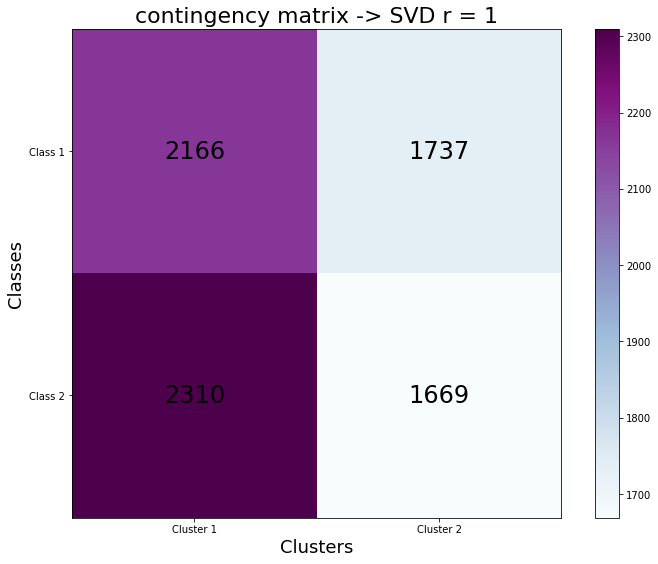

Homogeneity: 0.000481270590250941
Completeness: 0.0004877421751291779
V-measure: 0.0004844847723396428
Adjusted Rand Score: 0.0005972584505781009
Adjusted Mutual Info Score: 0.00039236722780950733



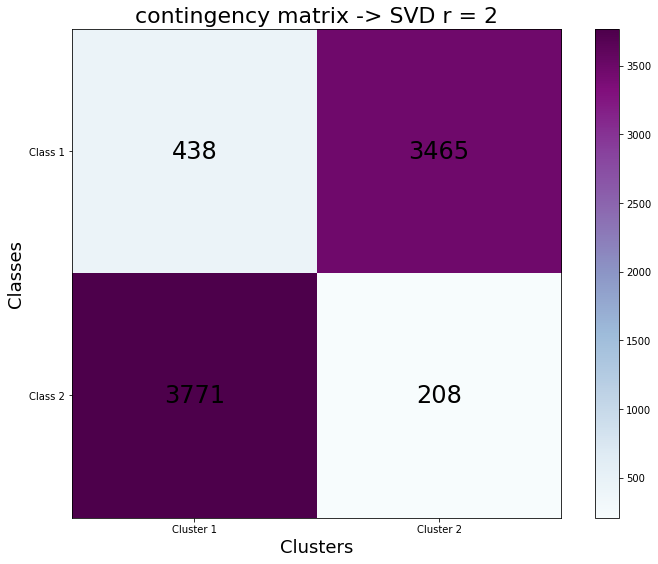

Homogeneity: 0.5964362917279331
Completeness: 0.5983939605301323
V-measure: 0.5974135223584838
Adjusted Rand Score: 0.6989953233140447
Adjusted Mutual Info Score: 0.5973766050171668



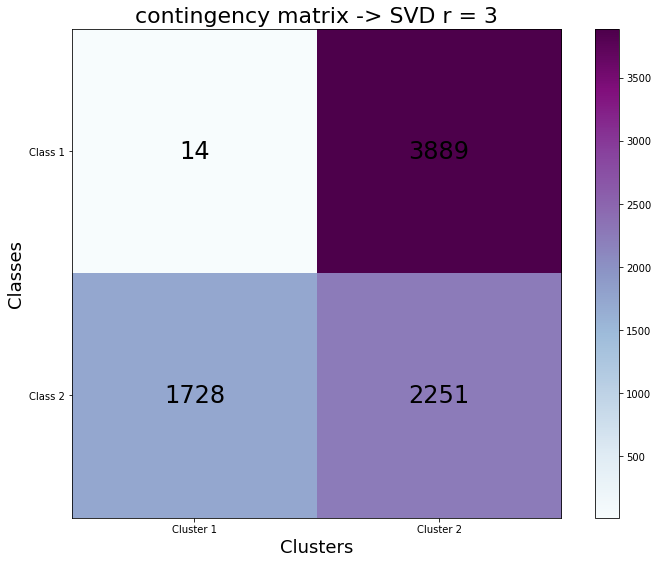

Homogeneity: 0.246526184532487
Completeness: 0.32350039637165645
V-measure: 0.27981613869919786
Adjusted Rand Score: 0.18076163785746324
Adjusted Mutual Info Score: 0.2797412928009



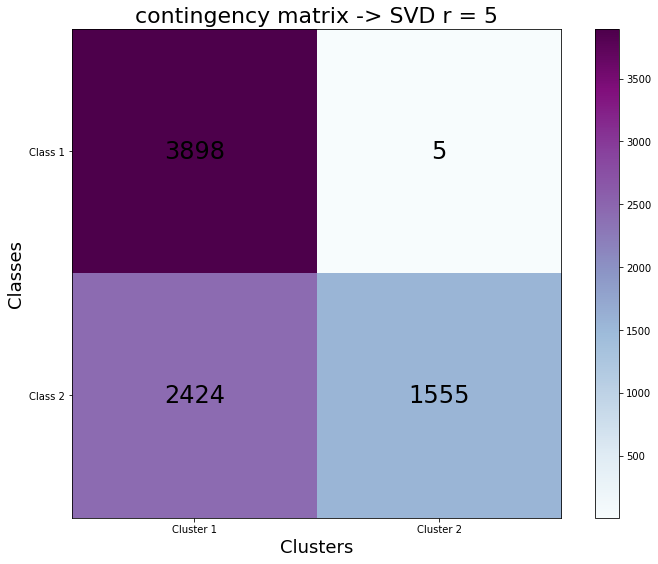

Homogeneity: 0.22344097858832396
Completeness: 0.3112878882920931
V-measure: 0.2601485526242697
Adjusted Rand Score: 0.14709654714070217
Adjusted Mutual Info Score: 0.260069678828862



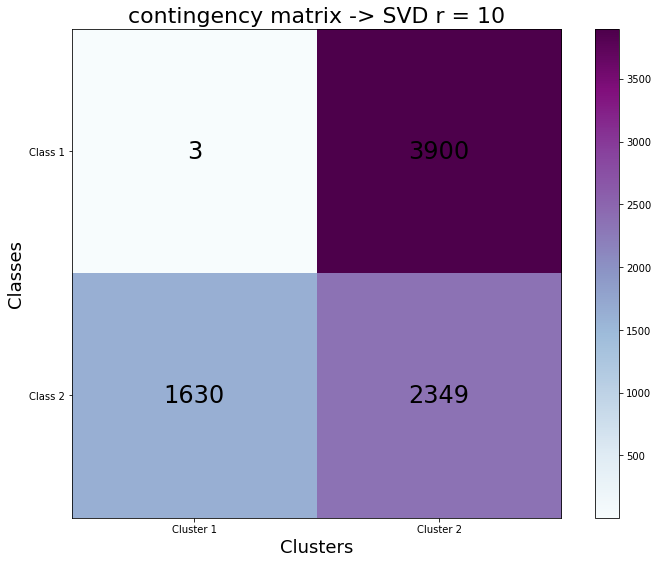

Homogeneity: 0.23872373656958912
Completeness: 0.32430493234301017
V-measure: 0.2750100998813942
Adjusted Rand Score: 0.16247142495464678
Adjusted Mutual Info Score: 0.27493362685089273



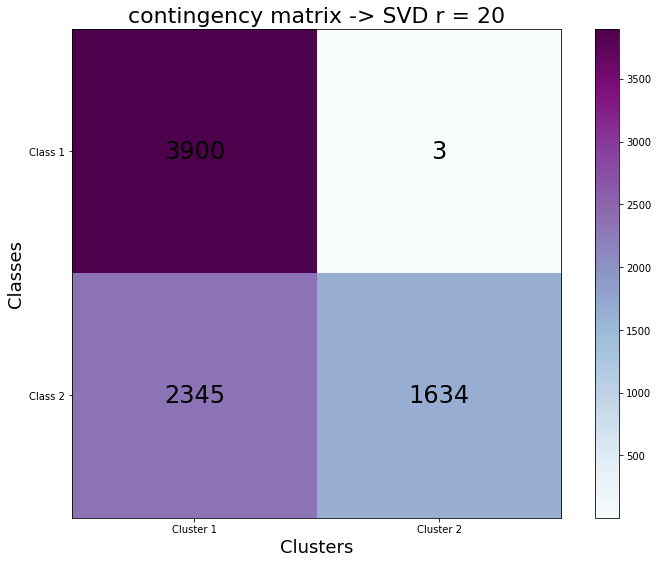

Homogeneity: 0.2394391848355036
Completeness: 0.32484374013400086
V-measure: 0.2756784474412541
Adjusted Rand Score: 0.16329098257870225
Adjusted Mutual Info Score: 0.27560208813530973



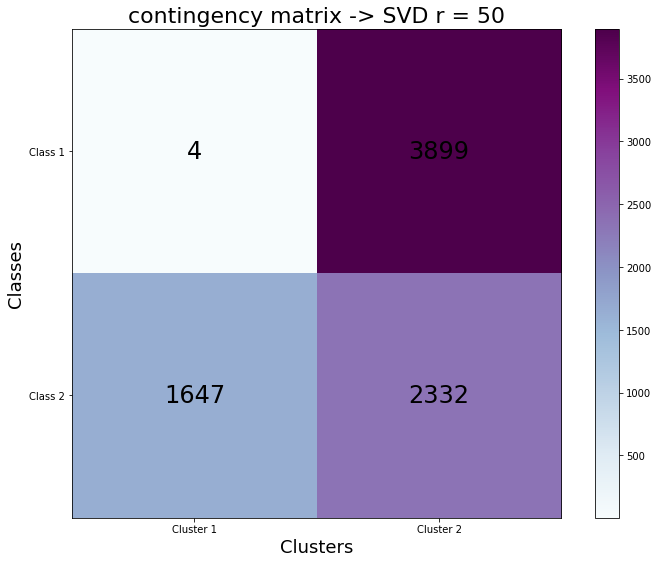

Homogeneity: 0.24072812938650442
Completeness: 0.3250852199775478
V-measure: 0.2766182769789817
Adjusted Rand Score: 0.16576200292278698
Adjusted Mutual Info Score: 0.27654216668498033



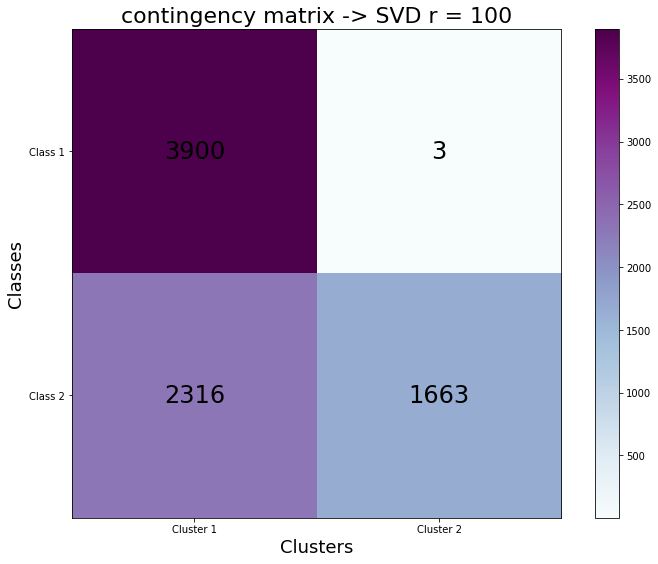

Homogeneity: 0.24464972273515986
Completeness: 0.32876894492231856
V-measure: 0.28053928396771927
Adjusted Rand Score: 0.1692944029751781
Adjusted Mutual Info Score: 0.2804637440196039



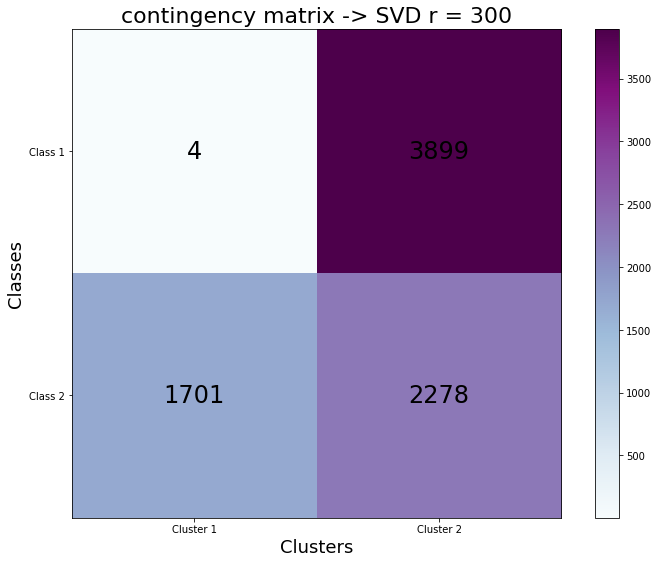

Homogeneity: 0.250491650470838
Completeness: 0.3324669505355906
V-measure: 0.285715640949084
Adjusted Rand Score: 0.17711117999111073
Adjusted Mutual Info Score: 0.28564104254516937



In [19]:
# SVD
print("SVD method")
kmeans = KMeans(n_clusters=2, max_iter = 1000, n_init = 30, random_state=0)
for i in range(len(Rs)):
    X = LSI_X[i]
    perform_kmeans(kmeans, X, Y, Rs[i], "SVD")

NMF method


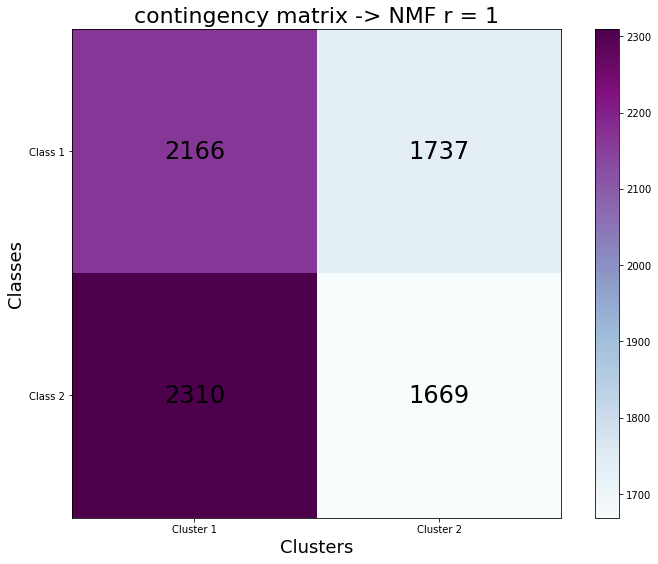

Homogeneity: 0.000481270590250941
Completeness: 0.0004877421751291779
V-measure: 0.0004844847723396428
Adjusted Rand Score: 0.0005972584505781009
Adjusted Mutual Info Score: 0.00039236722780950733



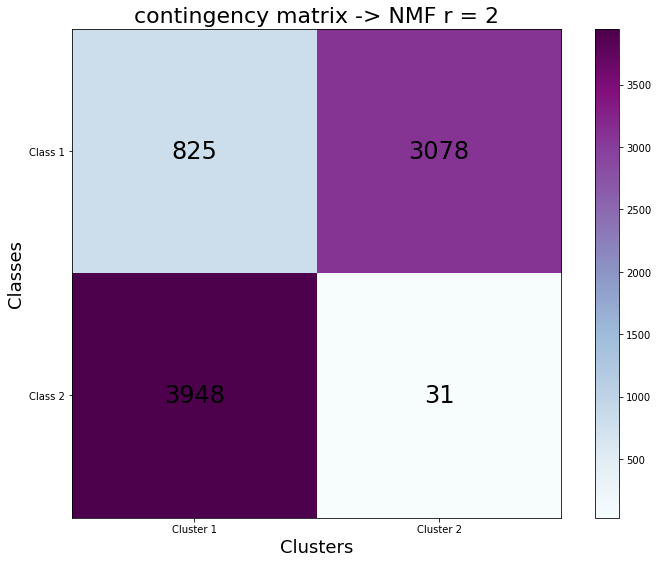

Homogeneity: 0.5659814025415224
Completeness: 0.5848897669067188
V-measure: 0.5752802561988877
Adjusted Rand Score: 0.612721409539299
Adjusted Mutual Info Score: 0.5752407336244971



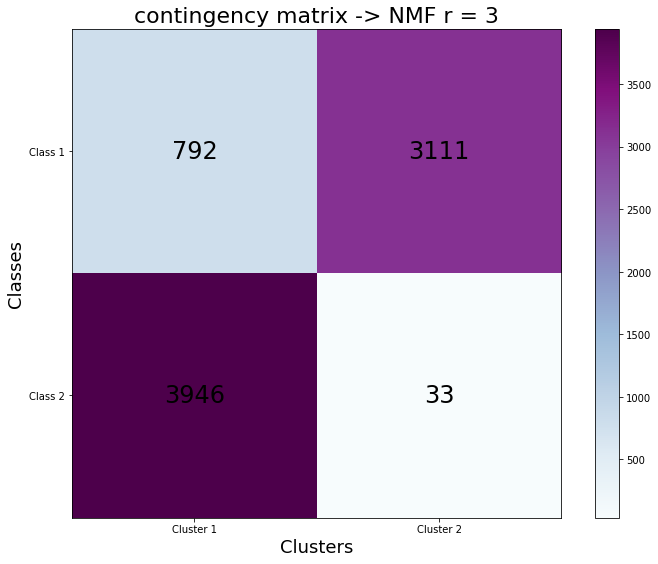

Homogeneity: 0.57501361644022
Completeness: 0.5925783293672179
V-measure: 0.5836638551971367
Adjusted Rand Score: 0.6250997768835465
Adjusted Mutual Info Score: 0.583625165640145



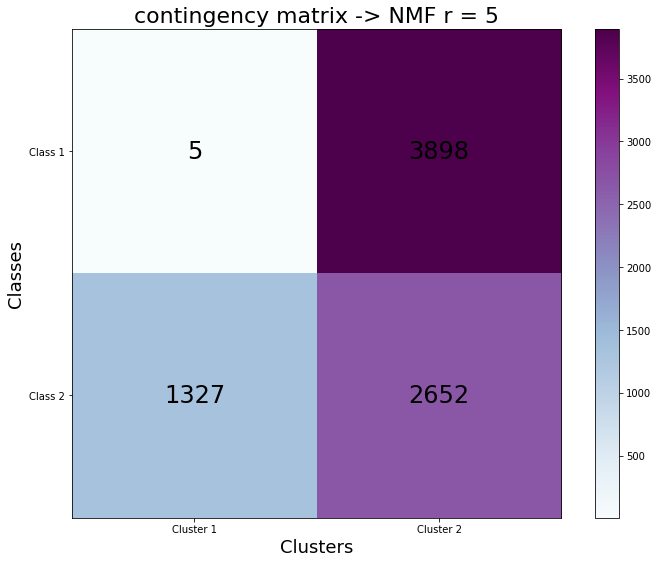

Homogeneity: 0.1847381286617241
Completeness: 0.2818539814647431
V-measure: 0.22318927372149455
Adjusted Rand Score: 0.10604917275300885
Adjusted Mutual Info Score: 0.22310333556618048



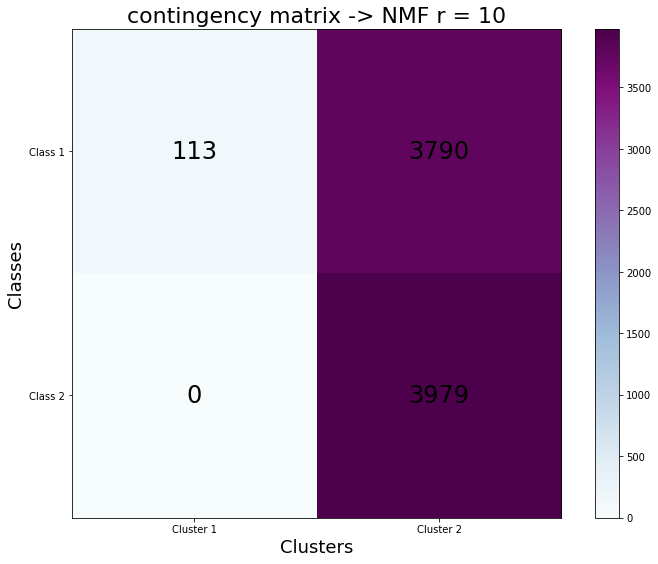

Homogeneity: 0.014691214289954626
Completeness: 0.1356024532531799
V-measure: 0.026510294565993825
Adjusted Rand Score: 0.0013732921152795757
Adjusted Mutual Info Score: 0.026348770082279344



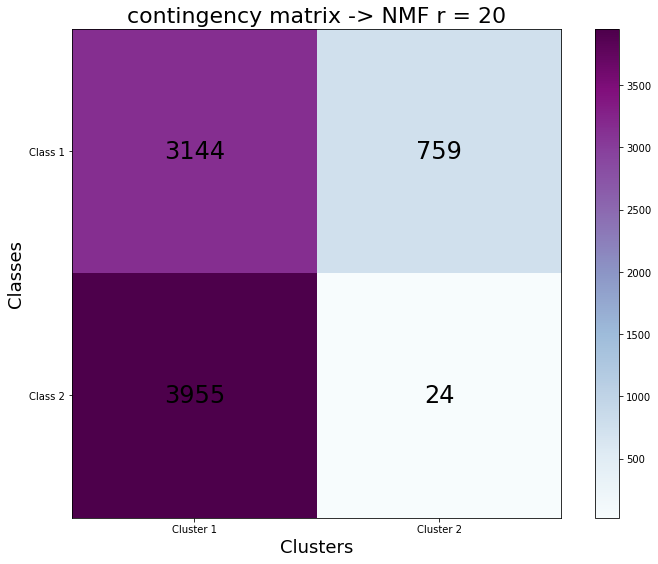

Homogeneity: 0.08814241966424217
Completeness: 0.1887692378989587
V-measure: 0.12017245884848084
Adjusted Rand Score: 0.038371046997691005
Adjusted Mutual Info Score: 0.1200625861628185



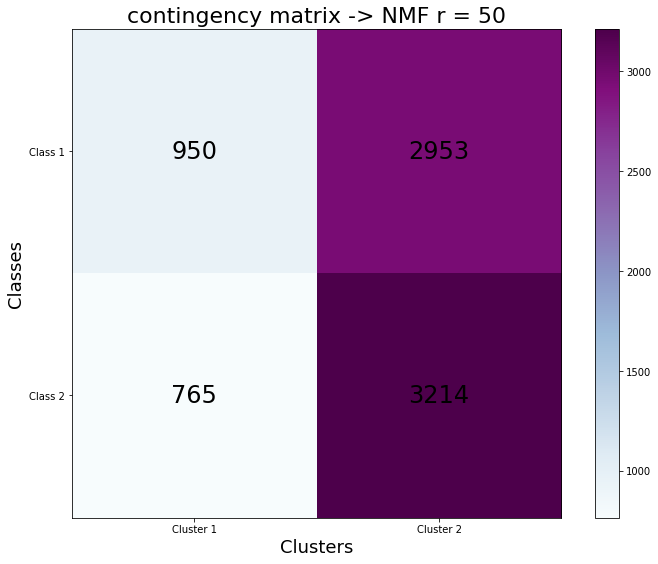

Homogeneity: 0.0027742608848135286
Completeness: 0.0036707122159721434
V-measure: 0.003160141450066654
Adjusted Rand Score: 0.0030861183843859576
Adjusted Mutual Info Score: 0.003056173015441179



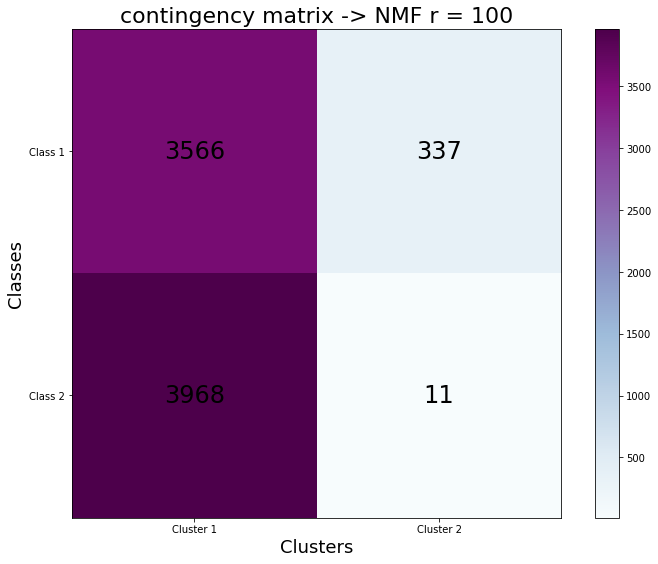

Homogeneity: 0.037114495036118876
Completeness: 0.14218510287536995
V-measure: 0.05886380512111379
Adjusted Rand Score: 0.008432939413694286
Adjusted Mutual Info Score: 0.05872697402160257



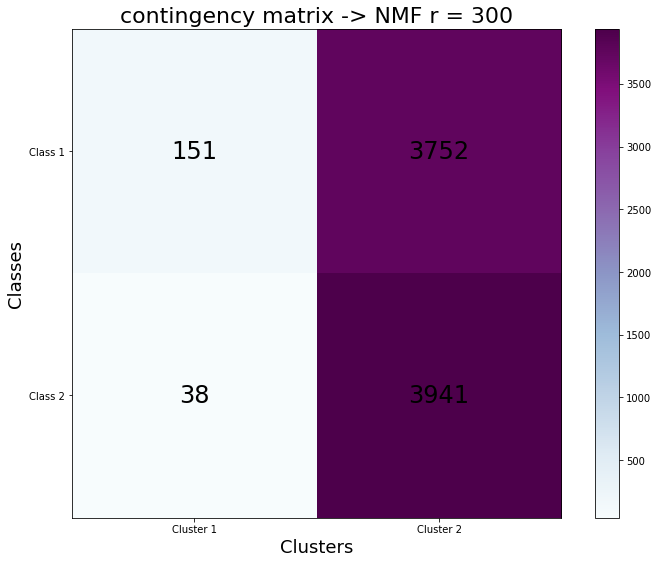

Homogeneity: 0.006975563432672403
Completeness: 0.04273128579201399
V-measure: 0.011993308739183204
Adjusted Rand Score: 0.0013720362140902955
Adjusted Mutual Info Score: 0.011837395998109785



In [21]:
# NMF
print("NMF method")
kmeans = KMeans(n_clusters=2, max_iter = 1000, n_init = 30, random_state=0)
for i in range(len(Rs)):
    X = NMF_X[i]
    perform_kmeans(kmeans, X, Y, Rs[i],"NMF")

SVD method


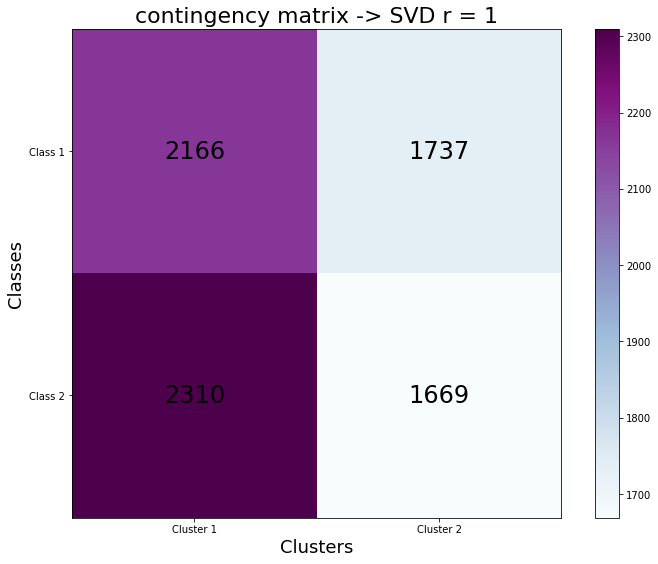

Homogeneity: 0.000481270590250941
Completeness: 0.0004877421751291779
V-measure: 0.0004844847723396428
Adjusted Rand Score: 0.0005972584505781009
Adjusted Mutual Info Score: 0.00039236722780950733



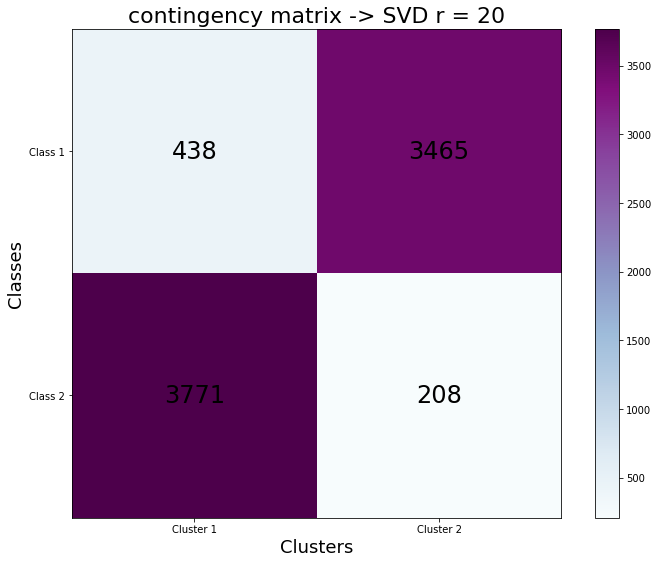

Homogeneity: 0.5964362917279331
Completeness: 0.5983939605301323
V-measure: 0.5974135223584838
Adjusted Rand Score: 0.6989953233140447
Adjusted Mutual Info Score: 0.5973766050171668



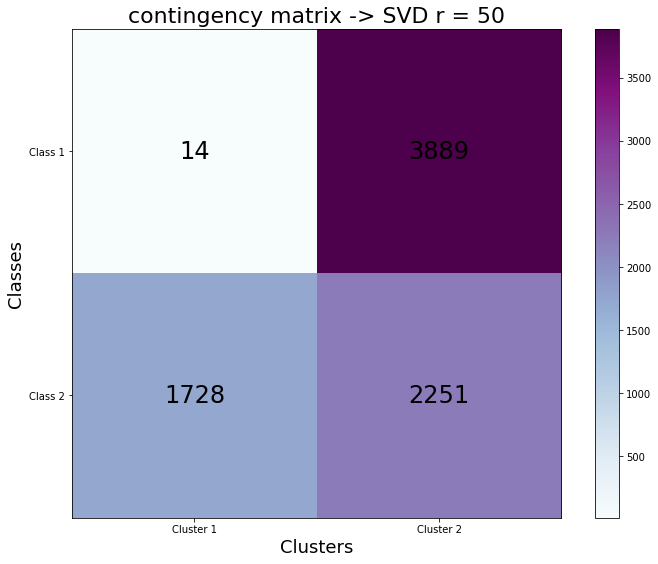

Homogeneity: 0.246526184532487
Completeness: 0.32350039637165645
V-measure: 0.27981613869919786
Adjusted Rand Score: 0.18076163785746324
Adjusted Mutual Info Score: 0.2797412928009



In [23]:
# SVD
print("SVD method")
kmeans = KMeans(n_clusters=2, max_iter = 1000, n_init = 30, random_state=0)
for i in range(len(R)):
    X = LSI_X[i]
    perform_kmeans(kmeans, X, Y, R[i], "SVD")